In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno

In [2]:
df = pd.read_csv("Data_Breach_Washington.csv")

In [3]:
df.tail(5)

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,BreachLifecycleRange,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange
658,11/18/2021 12:00:00 AM,01/28/2022 12:00:00 AM,Cyberattack,11/22/2021 12:00:00 AM,11/22/2021 12:00:00 AM,Keller Supply Company,11424,Ransomware,2486.0,Business,...,0,4.0,-4.0,0.0,True,0.0,NaN,False,71.0,0
659,09/08/2020 12:00:00 AM,01/29/2022 12:00:00 AM,Cyberattack,09/03/2020 12:00:00 AM,09/08/2020 12:00:00 AM,Fairmount Memorial Association,11425,Ransomware,6909.0,Business,...,1-99,0.0,5.0,5.0,True,5.0,NaN,True,508.0,1-99
660,11/23/2021 12:00:00 AM,01/31/2022 12:00:00 AM,Unauthorized Access,10/28/2021 12:00:00 AM,11/15/2021 12:00:00 AM,"Unum Group (""Unum"")",11427,NaN,1610.0,Business,...,1-99,0.0,26.0,26.0,False,18.0,8.0,False,69.0,1-99
661,09/16/2021 12:00:00 AM,01/31/2022 12:00:00 AM,Theft or Mistake,NaN,NaN,American Marriage Ministries,11428,NaN,16727.0,Non-Profit/Charity,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,137.0,Unknown
662,07/02/2021 12:00:00 AM,08/09/2021 12:00:00 AM,Cyberattack,NaN,NaN,"Spreadshirt, Inc.",11029,Ransomware,911.0,Business,...,Unknown,NaN,NaN,NaN,False,NaN,NaN,False,38.0,Unknown


In [4]:
df.columns

Index(['DateAware', 'DateSubmitted', 'DataBreachCause', 'DateStart', 'DateEnd',
       'Name', 'Id', 'CyberattackType', 'WashingtoniansAffected',
       'IndustryType', 'BusinessType', 'Year', 'YearText',
       'WashingtoniansAffectedRange', 'BreachLifecycleRange',
       'DaysToContainBreach', 'DaysToIdentifyBreach', 'DaysBreachLifecycle',
       'DiscoveredInProgress', 'DaysOfExposure',
       'DaysElapsedBetweenEndAndDiscovery', 'EndedOnDayDiscovered',
       'DaysElapsedBeforeNotification', 'DaysOfExposureRange'],
      dtype='object')

In [5]:
df["Start"] = pd.to_datetime(df['DateStart'])

In [6]:
df["Start"]

0     2017-09-26
1     2017-09-26
2            NaT
3     2017-09-27
4     2017-07-01
         ...    
658   2021-11-22
659   2020-09-03
660   2021-10-28
661          NaT
662          NaT
Name: Start, Length: 663, dtype: datetime64[ns]

In [7]:
df.head(5)

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToContainBreach,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,Start
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563.0,Business,...,0.0,183.0,183.0,False,16.0,167.0,False,14.0,1-99,2017-09-26
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390.0,Business,...,0.0,183.0,183.0,False,16.0,167.0,False,16.0,1-99,2017-09-26
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518.0,Health,...,NaN,NaN,NaN,False,NaN,NaN,False,30.0,Unknown,NaT
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373.0,Business,...,0.0,169.0,169.0,False,15.0,154.0,False,40.0,1-99,2017-09-27
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,2.0,271.0,273.0,True,273.0,NaN,False,28.0,200-299,2017-07-01


In [8]:
print(min(df["Start"]))
print(max(df["Start"]))

2008-04-01 00:00:00
2021-12-27 00:00:00


In [9]:
print(df.shape)
df.isnull().sum()

(663, 25)


DateAware                             24
DateSubmitted                          0
DataBreachCause                        0
DateStart                            107
DateEnd                              148
Name                                   0
Id                                     0
CyberattackType                      228
WashingtoniansAffected                30
IndustryType                           0
BusinessType                         337
Year                                   0
YearText                               0
WashingtoniansAffectedRange            0
BreachLifecycleRange                   0
DaysToContainBreach                  165
DaysToIdentifyBreach                 127
DaysBreachLifecycle                  177
DiscoveredInProgress                   0
DaysOfExposure                       160
DaysElapsedBetweenEndAndDiscovery    386
EndedOnDayDiscovered                   0
DaysElapsedBeforeNotification         24
DaysOfExposureRange                    0
Start           

In [10]:
(df.isnull().sum()/663)*100

DateAware                             3.619910
DateSubmitted                         0.000000
DataBreachCause                       0.000000
DateStart                            16.138763
DateEnd                              22.322775
Name                                  0.000000
Id                                    0.000000
CyberattackType                      34.389140
WashingtoniansAffected                4.524887
IndustryType                          0.000000
BusinessType                         50.829563
Year                                  0.000000
YearText                              0.000000
WashingtoniansAffectedRange           0.000000
BreachLifecycleRange                  0.000000
DaysToContainBreach                  24.886878
DaysToIdentifyBreach                 19.155354
DaysBreachLifecycle                  26.696833
DiscoveredInProgress                  0.000000
DaysOfExposure                       24.132730
DaysElapsedBetweenEndAndDiscovery    58.220211
EndedOnDayDis

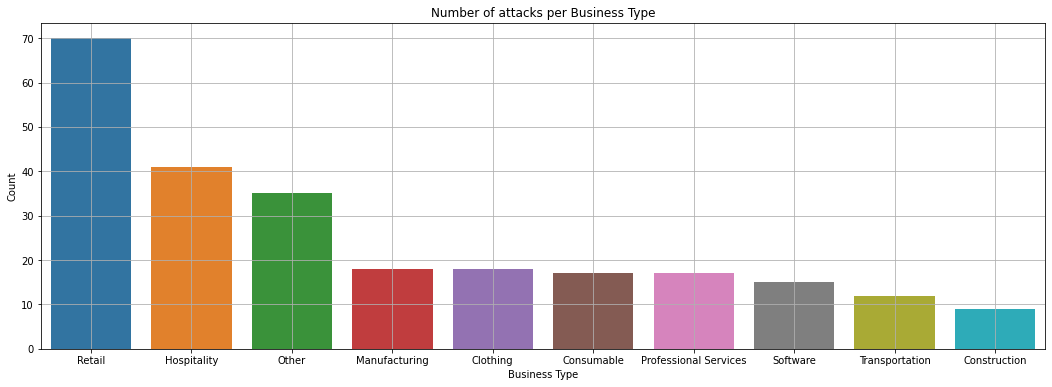

In [11]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['BusinessType'].value_counts().index[:10],y=df['BusinessType'].value_counts()[:10])
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

In [12]:
df['BusinessType'].value_counts().index

Index(['Retail', 'Hospitality', 'Other', 'Manufacturing', 'Clothing',
       'Consumable', 'Professional Services', 'Software', 'Transportation',
       'Construction', 'Human Resources', 'Accessories', 'Web Services',
       'Entertainment', 'Legal', 'Home', 'Cosmetic', 'Fitness',
       'Telecommunications', 'Shipping', 'Real Estate', 'Cleaning',
       'Cryptocurrency', 'Biotech'],
      dtype='object')

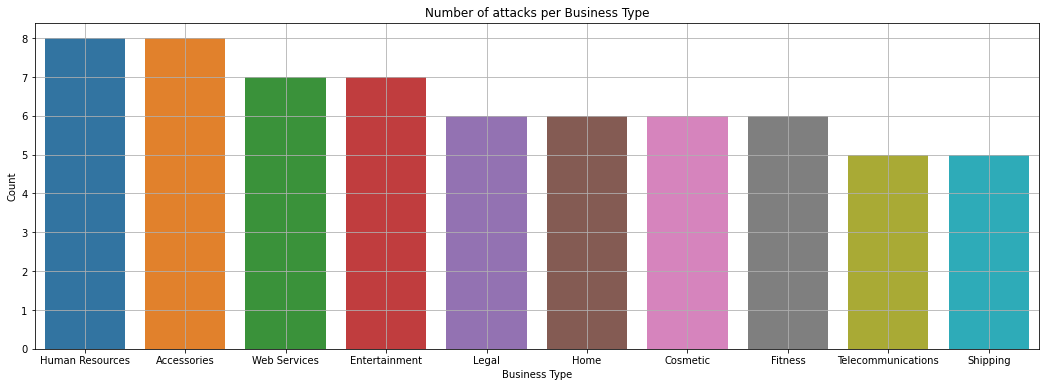

In [13]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['BusinessType'].value_counts().index[10:20],y=df['BusinessType'].value_counts()[10:20])
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

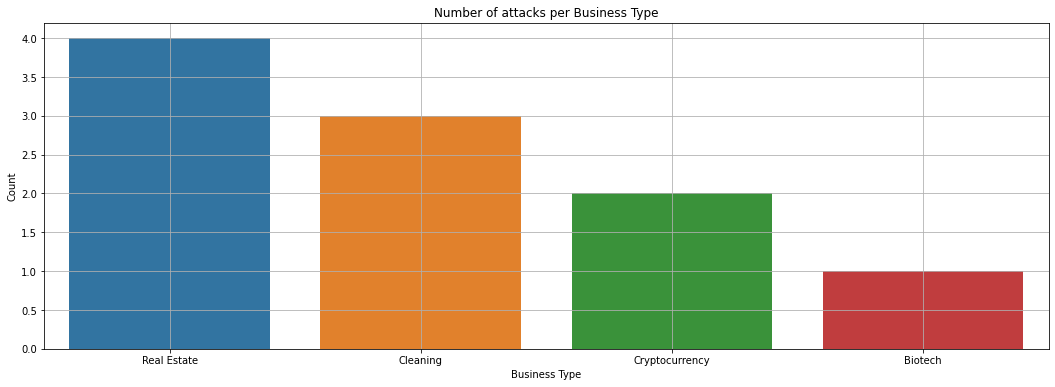

In [14]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['BusinessType'].value_counts().index[20:],y=df['BusinessType'].value_counts()[20:])
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

In [15]:
df["DayOfWeek"] = [t.dayofweek for t in pd.DatetimeIndex(df["Start"])]

In [16]:
df.head(5)

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,Start,DayOfWeek
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563.0,Business,...,183.0,183.0,False,16.0,167.0,False,14.0,1-99,2017-09-26,1.0
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390.0,Business,...,183.0,183.0,False,16.0,167.0,False,16.0,1-99,2017-09-26,1.0
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518.0,Health,...,NaN,NaN,False,NaN,NaN,False,30.0,Unknown,NaT,NaN
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373.0,Business,...,169.0,169.0,False,15.0,154.0,False,40.0,1-99,2017-09-27,2.0
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,271.0,273.0,True,273.0,NaN,False,28.0,200-299,2017-07-01,5.0


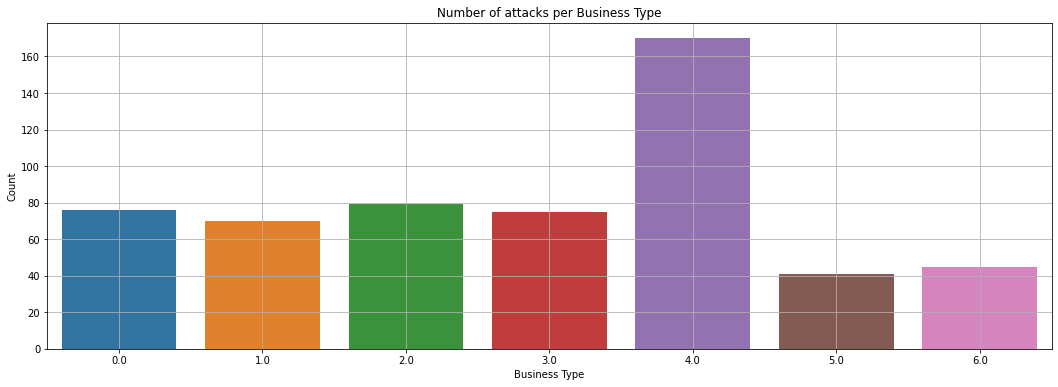

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['DayOfWeek'].value_counts().index,y=df['DayOfWeek'].value_counts())
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

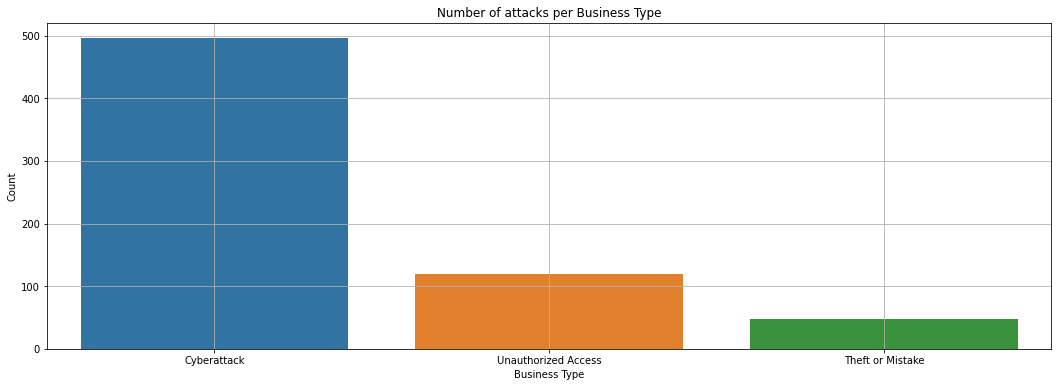

In [18]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['DataBreachCause'].value_counts().index,y=df['DataBreachCause'].value_counts())
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

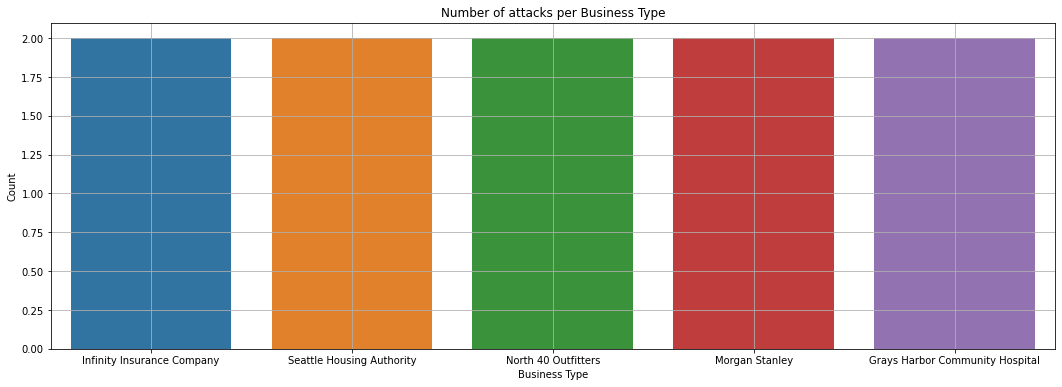

In [19]:
plt.figure(figsize=(18,6))
sns.barplot(x=df['Name'].value_counts()[:5].index,y=df['Name'].value_counts()[:5])
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Number of attacks per Business Type')
plt.grid(True)

<AxesSubplot:title={'center':'WashingtoniansAffected'}, xlabel='Start'>

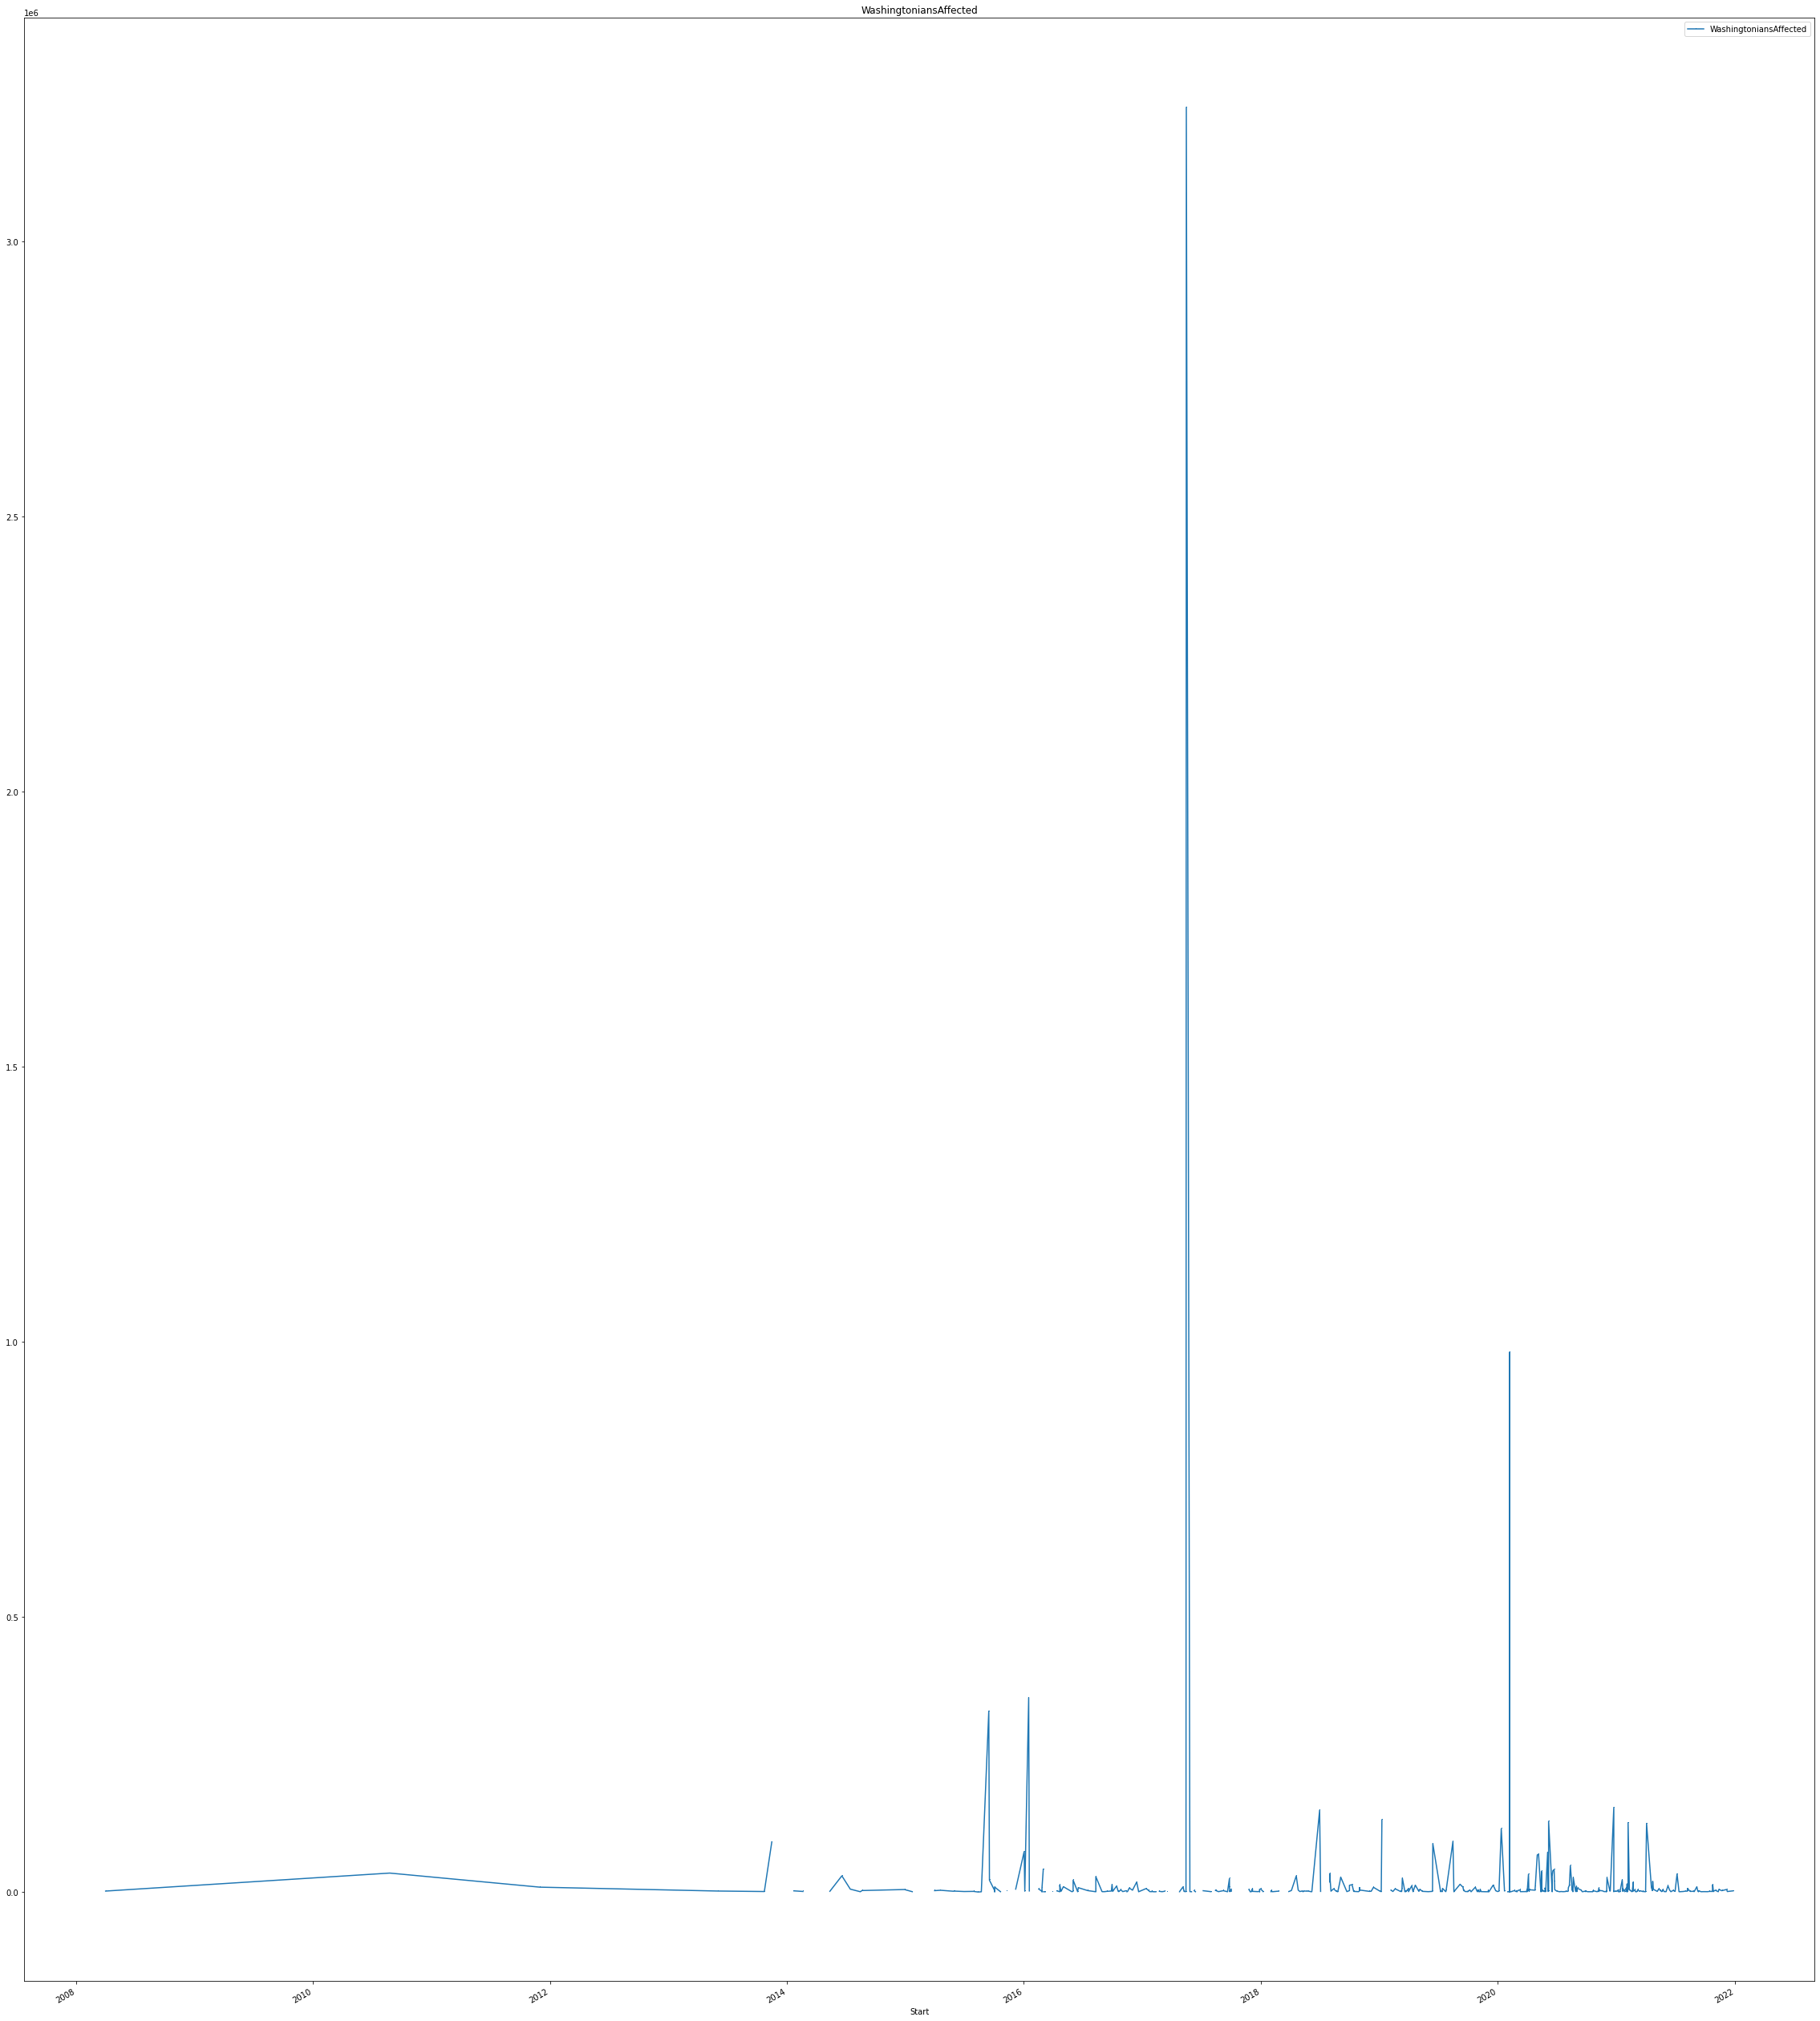

In [20]:
display_df = df[['Start','WashingtoniansAffected']].set_index('Start')
display_df.plot(title = 'WashingtoniansAffected',marker=',', figsize=(40,50))

In [21]:
max(df['WashingtoniansAffected'])

3243664.0

In [22]:
df[df['WashingtoniansAffected']==3243664]

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,Start,DayOfWeek
143,07/29/2017 12:00:00 AM,09/07/2017 12:00:00 AM,Cyberattack,05/16/2017 12:00:00 AM,07/31/2017 12:00:00 AM,"Equifax, Inc.",9735,Other,3243664.0,Finance,...,74.0,76.0,True,76.0,NaN,False,40.0,1-99,2017-05-16,1.0


In [23]:
dfAffectedYears = df[['Start','WashingtoniansAffected']]
dfAffectedYears["year"] = [t.year for t in pd.DatetimeIndex(dfAffectedYears["Start"])]

/tmp/ipykernel_5117/354214859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAffectedYears["year"] = [t.year for t in pd.DatetimeIndex(dfAffectedYears["Start"])]


In [24]:
dfAffectedYears.head(5)

,Start,WashingtoniansAffected,year
0,2017-09-26,24563.0,2017.0
1,2017-09-26,8390.0,2017.0
2,NaT,518.0,NaN
3,2017-09-27,2373.0,2017.0
4,2017-07-01,NaN,2017.0


In [25]:
dfAffectedYears.groupby('year').sum()

,WashingtoniansAffected
year,
2008.0,1742.0
2010.0,34455.0
2011.0,8844.0
2013.0,93948.0
2014.0,47083.0
2015.0,383062.0
2016.0,678998.0
2017.0,3360873.0
2018.0,367744.0


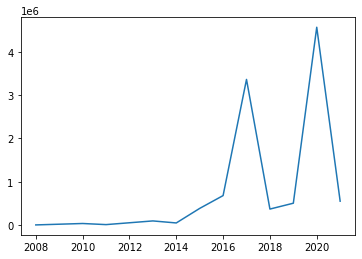

In [26]:
plt.plot(dfAffectedYears.groupby('year').sum())

In [27]:
df.columns

Index(['DateAware', 'DateSubmitted', 'DataBreachCause', 'DateStart', 'DateEnd',
       'Name', 'Id', 'CyberattackType', 'WashingtoniansAffected',
       'IndustryType', 'BusinessType', 'Year', 'YearText',
       'WashingtoniansAffectedRange', 'BreachLifecycleRange',
       'DaysToContainBreach', 'DaysToIdentifyBreach', 'DaysBreachLifecycle',
       'DiscoveredInProgress', 'DaysOfExposure',
       'DaysElapsedBetweenEndAndDiscovery', 'EndedOnDayDiscovered',
       'DaysElapsedBeforeNotification', 'DaysOfExposureRange', 'Start',
       'DayOfWeek'],
      dtype='object')

In [28]:
df["BreachLifecycleRange"]

0      100-199
1      100-199
2      Unknown
3      100-199
4      200-299
        ...   
658          0
659       1-99
660       1-99
661    Unknown
662    Unknown
Name: BreachLifecycleRange, Length: 663, dtype: object

In [29]:
df["DaysToIdentifyBreach"]

0      183.0
1      183.0
2        NaN
3      169.0
4      271.0
       ...  
658     -4.0
659      5.0
660     26.0
661      NaN
662      NaN
Name: DaysToIdentifyBreach, Length: 663, dtype: float64

In [30]:
df["DaysToIdentifyBreach"].mean()

167.580223880597

In [31]:
df.head()

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,Start,DayOfWeek
0,03/28/2018 12:00:00 AM,04/11/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Delta Airlines,9561,Malware,24563.0,Business,...,183.0,183.0,False,16.0,167.0,False,14.0,1-99,2017-09-26,1.0
1,03/28/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Cyberattack,09/26/2017 12:00:00 AM,10/12/2017 12:00:00 AM,"Best Buy Co, Inc.",9562,Malware,8390.0,Business,...,183.0,183.0,False,16.0,167.0,False,16.0,1-99,2017-09-26,1.0
2,03/14/2018 12:00:00 AM,04/13/2018 12:00:00 AM,Unauthorized Access,NaN,NaN,Inogen Inc.,9563,NaN,518.0,Health,...,NaN,NaN,False,NaN,NaN,False,30.0,Unknown,NaT,NaN
3,03/15/2018 12:00:00 AM,04/24/2018 12:00:00 AM,Cyberattack,09/27/2017 12:00:00 AM,10/12/2017 12:00:00 AM,Sears Holdings,9565,Malware,2373.0,Business,...,169.0,169.0,False,15.0,154.0,False,40.0,1-99,2017-09-27,2.0
4,03/29/2018 12:00:00 AM,04/26/2018 12:00:00 AM,Cyberattack,07/01/2017 12:00:00 AM,03/31/2018 12:00:00 AM,Hudson's Bay Company,9566,Malware,NaN,Business,...,271.0,273.0,True,273.0,NaN,False,28.0,200-299,2017-07-01,5.0


In [32]:
df_cause =df.groupby('DataBreachCause')['WashingtoniansAffected'].sum()

In [33]:
df_cause

DataBreachCause
Cyberattack            11073536.0
Theft or Mistake         914263.0
Unauthorized Access     3821475.0
Name: WashingtoniansAffected, dtype: float64

In [34]:
df.groupby('CyberattackType')[['WashingtoniansAffected']].sum()

,WashingtoniansAffected
CyberattackType,
Malware,2203691.0
Other,3320360.0
Phishing,309187.0
Ransomware,4179375.0
Skimmers,13109.0
Unclear/unknown,152982.0


In [35]:
df.groupby('CyberattackType')[['DaysOfExposure']].mean()

,DaysOfExposure
CyberattackType,
Malware,209.970370
Other,82.375000
Phishing,46.833333
Ransomware,75.560510
Skimmers,294.200000
Unclear/unknown,2.000000


In [36]:
df.groupby('CyberattackType')['CyberattackType'].count().sort_values(ascending=False)

CyberattackType
Ransomware         186
Malware            160
Phishing            54
Other               21
Skimmers            11
Unclear/unknown      3
Name: CyberattackType, dtype: int64

In [37]:
df[df['CyberattackType']=='Ransomware']

,DateAware,DateSubmitted,DataBreachCause,DateStart,DateEnd,Name,Id,CyberattackType,WashingtoniansAffected,IndustryType,...,DaysToIdentifyBreach,DaysBreachLifecycle,DiscoveredInProgress,DaysOfExposure,DaysElapsedBetweenEndAndDiscovery,EndedOnDayDiscovered,DaysElapsedBeforeNotification,DaysOfExposureRange,Start,DayOfWeek
73,07/14/2016 12:00:00 AM,11/09/2016 12:00:00 AM,Cyberattack,NaN,NaN,UFCW Local 655 Food Employers Pension Plan,9652,Ransomware,556.0,Finance,...,NaN,NaN,False,NaN,NaN,False,118.0,Unknown,NaT,NaN
192,07/16/2020 12:00:00 AM,07/28/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,French American School of Puget Sound,10204,Ransomware,3172.0,Education,...,160.0,160.0,False,103.0,57.0,False,12.0,100-199,2020-02-07,4.0
194,07/16/2020 12:00:00 AM,07/31/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,Auburn University,10206,Ransomware,1294.0,Education,...,160.0,160.0,False,103.0,57.0,False,15.0,100-199,2020-02-07,4.0
195,07/16/2020 12:00:00 AM,07/31/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,George W. Bush Presidential Center,10207,Ransomware,6797.0,Non-Profit/Charity,...,160.0,160.0,False,103.0,57.0,False,15.0,100-199,2020-02-07,4.0
196,07/16/2020 12:00:00 AM,08/03/2020 12:00:00 AM,Cyberattack,02/07/2020 12:00:00 AM,05/20/2020 12:00:00 AM,"Americares Foundation, Inc.",10208,Ransomware,2444.0,Non-Profit/Charity,...,160.0,160.0,False,103.0,57.0,False,18.0,100-199,2020-02-07,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,10/28/2021 12:00:00 AM,12/09/2021 12:00:00 AM,Cyberattack,10/24/2021 12:00:00 AM,11/24/2021 12:00:00 AM,Title Guaranty Company of Lewis County,11392,Ransomware,1109.0,Business,...,4.0,31.0,True,31.0,NaN,False,42.0,1-99,2021-10-24,6.0
655,08/16/2021 12:00:00 AM,01/28/2022 12:00:00 AM,Cyberattack,08/16/2021 12:00:00 AM,08/17/2021 12:00:00 AM,Accutech Systems Corporation,11394,Ransomware,1376.0,Business,...,0.0,1.0,True,1.0,NaN,False,165.0,1-99,2021-08-16,0.0
658,11/18/2021 12:00:00 AM,01/28/2022 12:00:00 AM,Cyberattack,11/22/2021 12:00:00 AM,11/22/2021 12:00:00 AM,Keller Supply Company,11424,Ransomware,2486.0,Business,...,-4.0,0.0,True,0.0,NaN,False,71.0,0,2021-11-22,0.0
659,09/08/2020 12:00:00 AM,01/29/2022 12:00:00 AM,Cyberattack,09/03/2020 12:00:00 AM,09/08/2020 12:00:00 AM,Fairmount Memorial Association,11425,Ransomware,6909.0,Business,...,5.0,5.0,True,5.0,NaN,True,508.0,1-99,2020-09-03,3.0


In [38]:
print(min(df["Start"]))
print(max(df["Start"]))


2008-04-01 00:00:00
2021-12-27 00:00:00
